In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('customer_data_records.csv')

In [3]:
# Extract the relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
import pandas as pd

data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Annual_Income_(USD$)': [15, 16, 17, 18, 19, 80, 86, 87, 88, 90],  
    'Spending_Score_(1-100)': [38, 81, 6, 77, 40, 76, 94, 3, 72, 14]
}

df = pd.DataFrame(data)
print(df)


   CustomerID  Annual_Income_(USD$)  Spending_Score_(1-100)
0           1                    15                      38
1           2                    16                      81
2           3                    17                       6
3           4                    18                      77
4           5                    19                      40
5           6                    80                      76
6           7                    86                      94
7           8                    87                       3
8           9                    88                      72
9          10                    90                      14


In [7]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=0)

In [8]:
data['cluster'] = kmeans.labels_
data

,CustomerID,Annual Income (k$),Spending Score (1-100),cluster
0,1,117,20,1
1,2,107,59,1
2,3,29,36,0
3,4,121,19,1
4,5,86,90,0
...,...,...,...,...
169,170,111,76,1
170,171,138,87,1
171,172,84,15,1
172,173,107,92,1


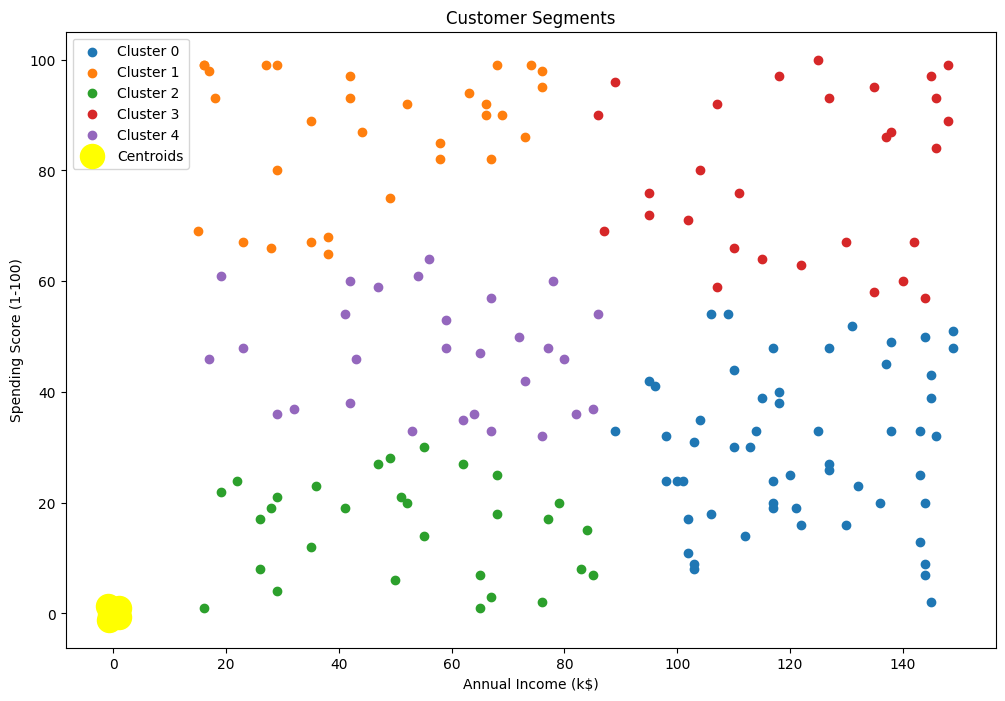

In [5]:
# Fit KMeans and predict clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.scatter(X[clusters == i]['Annual Income (k$)'], 
                X[clusters == i]['Spending Score (1-100)'], 
                label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()